<a href="https://colab.research.google.com/github/Pavel123465789/01NAEX/blob/main/GapStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GapFinder**

In [10]:
runs = range(2,13)              # id fo files
filename = 'dataFrames.zip'     # name of uploaded zip file (with data)
path = "/content/dataFrames/content/dataFrames/"       # path to data
root_name = "E4_R_pruchod_"     # root name of data file

In [21]:
!pip install pandas==1.5.0
import pandas as pd
import numpy as np
import os
import errno
import zipfile
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# data unzip
%cd /content
try:
    # make folder
    os.mkdir(f'{filename[:-4]}')
    localfile = filename
    # extract files from the zip into the made folder
    with zipfile.ZipFile(localfile) as zip_ref:
        zip_ref.extractall(filename[:-4])        
except OSError as e:
    # if error occurred
    if e.errno != errno.EEXIST:
        raise
    else:
        print(f'{filename[:-4]} folder already exists!')
     

/content


                  0
count  25419.000000
mean       1.000236
std        0.026610
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000


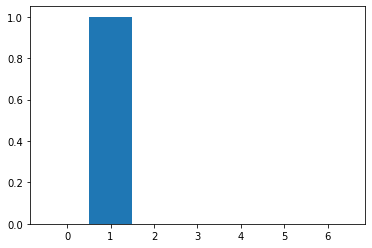

In [32]:

df  = pd.read_pickle(path + root_name + str(2) + ".pkl")
# drop columns of "id_run" and "id_ped"
df.drop(df.columns[[0,1]], axis=1, inplace=True)
gaps = []
for index, row in df.iterrows():
  frames_notnull = row.index[row.notnull()]
  frames_notnull = list(map( lambda x: int(x[:-2]), frames_notnull))
  frames_notnull = frames_notnull[::2]
  diff = np.diff(np.array(frames_notnull))
  gaps.extend(diff)
plt.hist(gaps, bins = np.arange(max(gaps)+4)-0.5, density=True)
print(pd.DataFrame(gaps).describe())
